# Making a contour map of global temperature

### Reading NetCDF files
NetCDF (Network Common Data Form) is a set of software libraries. It supports the creation, access, and sharing of array-oriented scientific data. 
For more information on NetCDF can be found here: <br>
  >  https://unidata.github.io/netcdf4-python/netCDF4/index.html

First let's import necessary modules: <br>
Cartopy is a Python package designed for geospatial data processing in order to produce maps and other geospatial data analyses. For more information on cartopy can be found here: <br>
  >  https://scitools.org.uk/cartopy/docs/latest/

In [1]:
from netCDF4 import Dataset
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

Open and read a netCDF file.

In [4]:
# Open a netCDF file
path='/Users/jungeunl/Cycad/class/data/'
filename='trmm_mon_1998_2015.nc'
f1=Dataset(path+filename,'a')

Let's check what is f1.

Print variables in the file.

In [6]:
print (f1.variables.keys())

odict_keys(['time', 'longitude', 'latitude', 'pcp', 'err', 'weight'])


Let's check some of the variables. 

In [10]:
print(f1.variables['latitude'])

<class 'netCDF4._netCDF4.Variable'>
float64 latitude(latitude)
    units: degrees_north
    long_name: Latitude
unlimited dimensions: 
current shape = (400,)
filling on, default _FillValue of 9.969209968386869e+36 used



To see the values for the latitude variable:

We can assign the values as a 'lat' variable.

In [12]:
lat=f1.variables['latitude'][:]

#### Exercise
Check the variable longitude and assign it as a "lon" variable.

In [21]:
lon=f1.variables['longitude'][:]

"pcp" is a variable for precipitation. 

In [16]:
print(f1.variables['pcp'])

<class 'netCDF4._netCDF4.Variable'>
float32 pcp(time, latitude, longitude)
    comments: Unknown1 variable comment
    long_name: precipitation:
    units: mm/hr
    grid_name: grid-1
    grid_type: linear
    level_description: Earth surface
    time_statistic: instantaneous
    _FillValue: -9999.9
unlimited dimensions: time
current shape = (12, 400, 1440)
filling on


You can see that the unit is mm/hour. I'm going to change the unit to mm/day.

In [17]:
prcp=f1.variables['pcp'][:]*24.

Let's check the dimension of prcp.

In [18]:
print(prcp.shape)

(12, 400, 1440)


The dimensions are time, latitude and longitude.

Let's make a contour plot. We need a 2-D variable. So, let's make a plot for January precipitation.

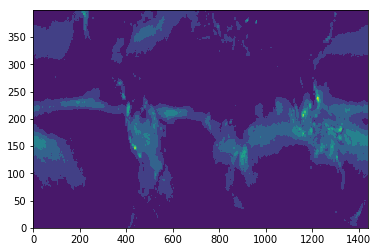

In [19]:
plt.contourf(prcp[0,:,:])

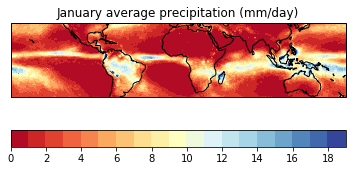

In [23]:
# color map
cmap1=plt.cm.RdYlBu

# map projection
proj = ccrs.PlateCarree()

# set contour levels
levels = np.arange(0,20,1)

# Make a plot
ax = plt.axes(projection=proj)
cs=ax.contourf(lon, lat, prcp[0,:,:],levels,
                transform=proj,
                cmap=cmap1)
ax.coastlines()
ax.set_extent([-180, 180, -40, 40]) # longitude latitude extent
plt.title('January average precipitation (mm/day)') #title
plt.colorbar(cs, orientation='horizontal') # color map